In [1]:
import pandas as pd
import csv
import time
import openpyxl
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
from itertools import islice
import openpyxl
import pandas as pd

In [5]:
int(int(times[0]) / 1e9)

NameError: name 'times' is not defined

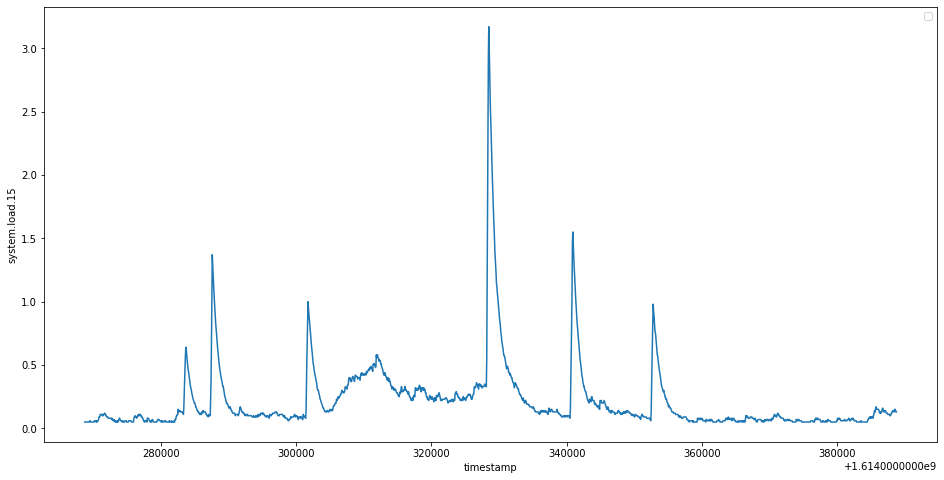

In [3]:
gt_file = "../../data/groundtruth_a.xlsx"
wb = openpyxl.open(gt_file)
ws = wb.active
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = DataFrame(data, index=idx, columns=cols)
df['time'] = pd.to_datetime(df.time)
df['time'] = df['time'] - pd.Timedelta('00:00:00')
gjjcore3 = df[df.cmdb_id == 'gjjcore3']
times = gjjcore3[gjjcore3.故障内容 == 'CPU使用率高'].time.values

data_file = "../../data/system-a/gjjcore3##system.load.15.csv"
# data_file = "../../data/system-a/gjjcore3##system.cpu.pct_usage.csv"

df = pd.read_csv(data_file, index_col=0)
df.drop(columns=["cmdb_id", "kpi_name"], inplace=True)
plt.figure(figsize=(16,8))
for i in times[:0]:
    xvalue = int(int(i) / 1e9)
    plt.axline((xvalue, 0), (xvalue, 1), color='r')
    bvalue = xvalue + 8 * 60 * 60
    plt.axline((bvalue, 0), (bvalue, 1), color='y')
    prevalue = xvalue - 8*60*60
    plt.axline((prevalue, 0), (prevalue, 1), color='g')
plt.legend(['gt', 'gt + 8:00', 'gt - 8:00'])
plt.xlabel("timestamp")
plt.ylabel("system.load.15")
plt.plot(df.timestamp[:2000], df.value[:2000])
plt.savefig("../../sequence.jpg")

2021-03-09T16:23:00.000000000


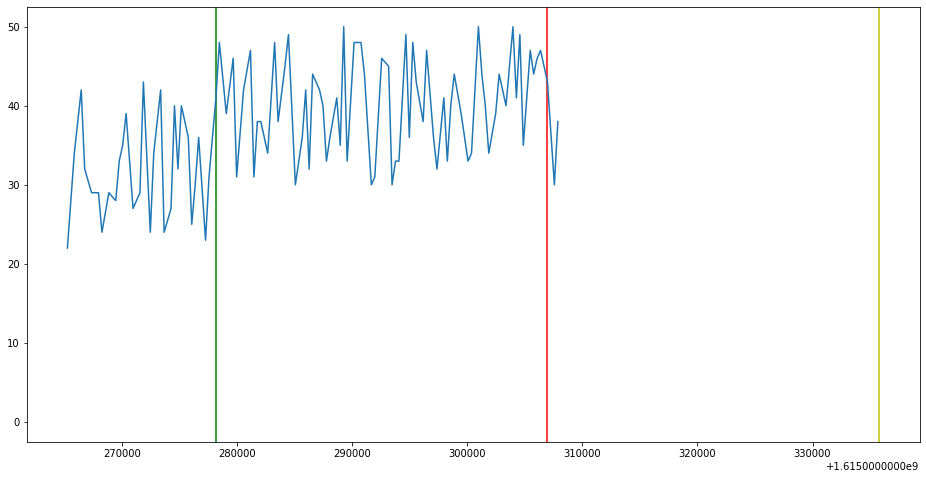

In [110]:
gt_file = "../../data/groundtruth_b.xlsx"
wb = openpyxl.open(gt_file)
ws = wb.active
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = DataFrame(data, index=idx, columns=cols)
df['time'] = pd.to_datetime(df.time)
df['time'] = df['time'] - pd.Timedelta('00:00:00')
tomcat02 = df[df.cmdb_id == 'Tomcat02']
times = tomcat02[tomcat02.故障内容 == 'JVM OOM Heap'].time.values

data_file = "../../data/system-b/Tomcat02##Tomcat-MEMORY_7441-MEMORY_JVMMemoryUsedPercent.csv"
# data_file = "../../data/system-a/gjjcore3##system.cpu.pct_usage.csv"

df = pd.read_csv(data_file, index_col=0)
df.drop(columns=["cmdb_id", "kpi_name"], inplace=True)
df.sort_values(by=['timestamp'], inplace=True)
plt.figure(figsize=(16,8))
for i in times[4:5]:
    print(i)
    xvalue = int(int(i) / 1e9)
    plt.axline((xvalue, 0), (xvalue, 1), color='r')
    bvalue = xvalue + 8 * 60 * 60
    plt.axline((bvalue, 0), (bvalue, 1), color='y')
    prevalue = xvalue - 8*60*60
    plt.axline((prevalue, 0), (prevalue, 1), color='g')
plt.plot(df.timestamp[1100:1200], df.value[1100:1200])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [4]:
import torch
a = torch.tensor([1,2,3])
b = torch.tensor([1,2,3])
c = torch.stack([a,b])

In [7]:
torch.nan_to_num(a)

tensor([1, 2, 3])